# Adventures of Adventure Works
![](title.png)


# Table-of-contents
[Introduction](#Introduction)
<br>
[Part 1: Data Exploration](#data_exploration)
<br>
[Part 2: Machine Learning](#ml)
- [Machine Learning - Classification](#classification)
<br>
- [Machine Learning - Regression](#regression)

[Conclusions and Recommendations](#conclusions)




# Introduction
<hr>
In 1998, the Adventure Works Cycles company collected a large volume of data about their existing customers, including demographic features and information about purchases they have made. The company is particularly interested in analyzing customer data to determine any apparent relationships between demographic features known about the customers and the likelihood of a customer purchasing a bike.

In this project, you must tackle four challenges:

- Explore the data and gain some insights into Adventure Works customer characteristics and purchasing behavior.
- Build a classification model to predict customer purchasing behavior.
- Build a regression model to predict customer purchasing behavior.
- Provide recomnendations for help in future sales.

[Back to TOC](#Table-of-contents)
<a id='data_exploration'></a>
# Data Exploration
<hr>
## Creating the Dataset
The 3 files were read and merged to create the bike shop dataset.

In [6]:
df_ave = pd.read_csv("AW_AveMonthSpend.csv", sep=",", encoding='latin-1')
df_buyer = pd.read_csv("AW_BikeBuyer.csv", sep=",", encoding='latin-1')
df_customer = pd.read_csv("AW_Customers.csv", sep=",", encoding='latin-1')

In [11]:
merged_df.head()

,CustomerID,AveMonthSpend,BikeBuyer,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,87,1,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,139848
1,11001,127,1,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,106696
2,11002,123,1,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,...,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,101237
3,11003,50,1,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,...,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,88848
4,11004,99,1,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,...,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,122653


### Cleaning the dataset

- Some columns in the dataset like Title, Middle name etc. had nearly no usable values, so they were dropped.
- Similarly, some other columns such as FirstName, Last Name etc. that would not be useful while modeling were also dropped.

In [13]:
merged_df_cleaned.head(3)

,CustomerID,AveMonthSpend,BikeBuyer,City,StateProvinceName,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,TotalChildren,YearlyIncome
0,11000,87,1,Rockhampton,Queensland,Australia,1966-04-08,Bachelors,Professional,M,M,1,0,2,139848
1,11001,127,1,Seaford,Victoria,Australia,1965-05-14,Bachelors,Professional,M,S,0,1,3,106696
2,11002,123,1,Hobart,Tasmania,Australia,1965-08-12,Bachelors,Professional,M,M,1,1,3,101237


### Dropping Duplicates
There were a few duplicates in the dataset. Following is a count before and after dropping the duplicates

In [21]:
print ("\nWith duplicates - rows and columns: ", merged_df_cleaned.shape)
merged_df_cleaned = merged_df_cleaned.drop_duplicates()
print ("After dropping duplicates - rows and columns: ", merged_df_cleaned.shape)
print()


With duplicates - rows and columns:  (18435, 15)
After dropping duplicates - rows and columns:  (18435, 15)



### Adding Age
The study was done in 1998 so age was caclulated as a difference from 1998 to the birth date and added to the dataset.


In [35]:
prediction_df = get_prediction_df(merged_df_cleaned)
prediction_df.head()

,Age,AveMonthSpend,BikeBuyer,CustomerID,Education,Gender,HomeOwnerFlag,MaritalStatus,NumberCarsOwned,NumberChildrenAtHome,Occupation,TotalChildren,YearlyIncome
0,31,87,1,11000,Bachelors,M,1,M,0,0,Professional,2,139848
1,32,127,1,11001,Bachelors,M,0,S,1,3,Professional,3,106696
2,32,123,1,11002,Bachelors,M,1,M,1,3,Professional,3,101237
3,29,50,1,11003,Bachelors,F,0,S,1,0,Professional,0,88848
4,29,99,1,11004,Bachelors,F,1,S,4,5,Professional,5,122653


In [36]:
prediction_df.describe()

,Age,AveMonthSpend,BikeBuyer,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
count,19203.000000,19203.000000,19203.000000,19203.000000,19203.000000,19203.000000,19203.000000,19203.000000,19203.000000
mean,35.361037,72.522002,0.334062,20228.430245,0.677030,1.497162,0.998750,1.999635,78279.700516
std,11.208885,27.199674,0.471674,5355.917668,0.467624,1.131602,1.512989,1.679865,39834.965823
min,17.000000,20.000000,0.000000,11000.000000,0.000000,0.000000,0.000000,0.000000,8217.000000
25%,27.000000,52.000000,0.000000,15565.500000,0.000000,1.000000,0.000000,0.000000,47874.500000
50%,34.000000,68.000000,0.000000,20228.000000,1.000000,2.000000,0.000000,2.000000,76456.000000
75%,43.000000,84.000000,1.000000,24903.500000,1.000000,2.000000,2.000000,3.000000,105331.500000
max,87.000000,174.000000,1.000000,29483.000000,1.000000,4.000000,5.000000,5.000000,201090.000000


## Analyzing the Dataset

#### Numerical Data
Let us start with some histograms to look at the shape of our numerical data.
- The yearly income data is somewaht mulinomial with a slight right skew
- Age data is right skewed 
- Ave monthly spending data is also multinomial with a right skew

To get these data in proper shape, some transformation would be required.

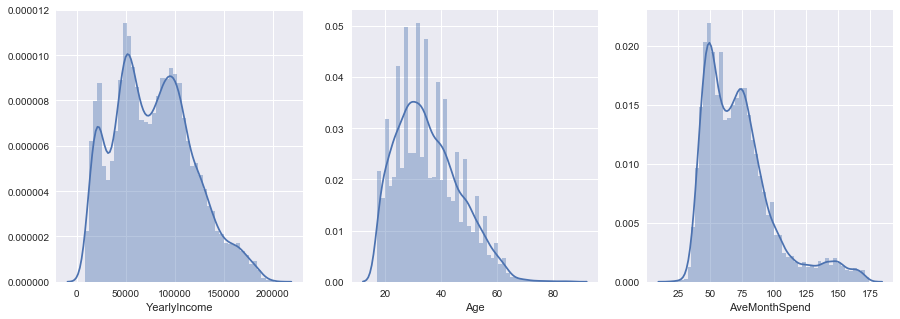

In [56]:
explore_numerical_data(prediction_df)

#### Categorical Data

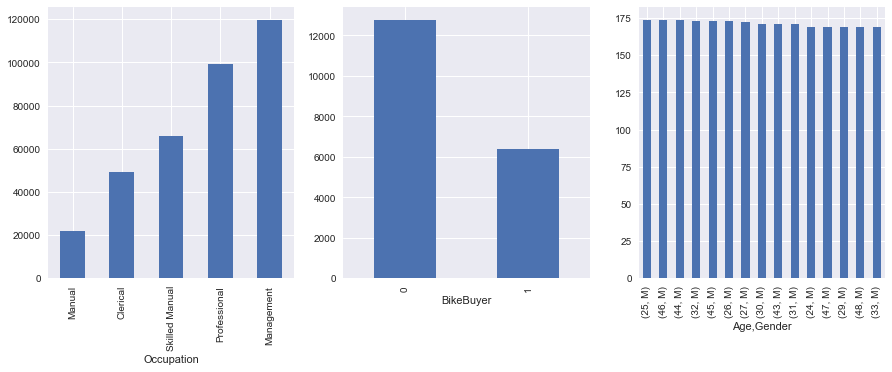

In [63]:
fig = plt.figure(figsize = (15,5))
fig.clf()
fig.subplots_adjust(hspace=.3)
ax0 = fig.add_subplot(1, 3, 1)
ax1 = fig.add_subplot(1, 3, 2) 
ax2 = fig.add_subplot(1, 3, 3) 

prediction_df.groupby('Occupation')['YearlyIncome'].apply(np.median).sort_values(ascending = True).plot(kind='bar', ax = ax0)
prediction_df.groupby('BikeBuyer').size().plot(kind='bar', ax = ax1)
prediction_df.groupby(['Age', 'Gender'])['AveMonthSpend'].max().sort_values(ascending=False).head(15).plot(kind='bar')

fig.savefig('plot1.png')

#### Relationships
We can also look at some different relationships that might come in handy to iron out the data

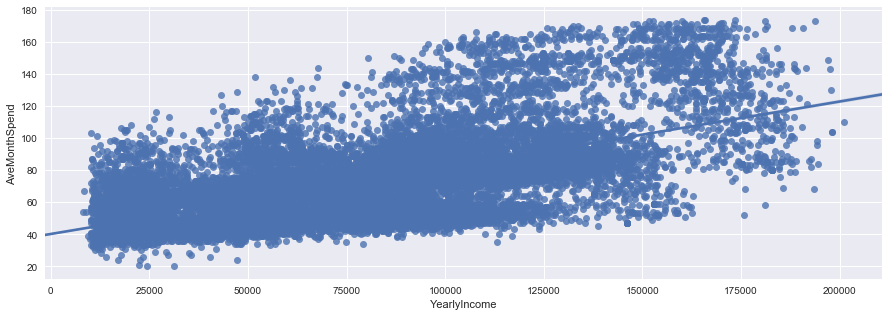

In [79]:
explore_relationships(prediction_df)

[Back to TOC](#Table-of-contents)
<a id='ml'></a>
# Part 3: Machine Learning (ML)
![](let_the_machine_do_it.png)
We will now use some machine learning models to:
- Build a classification model to predict customer purchasing behavior
- Build a regression model to predict customer purchasing behavior


## Classification
We started with some basic default values and ran a number of models to see which one seems to be the best one. We were looking at the simplest model that would give the best results. 

#### Azure ML Classification Run No. 1 (Initial probe)
![](classification_experiment1.png)

![](classification_experiment1_res.png)

### Interpretation of initial ML run 
- The results of all the machine learning techniques provide nearly the same accuracy on the first run, around 0.8. 
- Sole exception is the Neural Network which for provided a lower then expected accuracy. 

Of all the techniques, logistic regression, which is probably the easiest to understand provides the best result. We will use the logistic regression for further analysis.

## Optimization
Azure ML provides a number of techniques to improve the models without much coding effort. We will try using these techniques to further refine our model. 

[Back to TOC](#Table-of-contents)
<a id='conclusions'></a>
# Conclusions and Recommendations
![](conclusions.png)
<hr>
### Assumptions and analysis
tbd

### Interpreting/Rationalizing the result of analysis
tbd

### Recommendations
tbd

<hr>
[Back to TOC](#Table-of-contents)
<a id='scripts'></a>
# Scripts
<hr>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
from dateutil.relativedelta import relativedelta

In [8]:
df_ave = pd.read_csv("AW_AveMonthSpend.csv", sep=",", encoding='latin-1')
df_buyer = pd.read_csv("AW_BikeBuyer.csv", sep=",", encoding='latin-1')
df_customer = pd.read_csv("AW_Customers.csv", sep=",", encoding='latin-1')

df_ave = df_ave.rename(index=str, columns={"?CustomerID": "CustomerID"})
df_buyer = df_buyer.rename(index=str, columns={"?CustomerID": "CustomerID"})
df_customer = df_customer.rename(index=str, columns={"?CustomerID": "CustomerID"})

In [27]:
merged_df = df_ave.copy()
merged_df = merged_df.merge(df_buyer, left_on = 'CustomerID', right_on='CustomerID')
merged_df = merged_df.merge(df_customer, left_on = 'CustomerID', right_on='CustomerID')

In [28]:
# get rid of FirstName, MiddleName, LastName, Suffix, AddressLine1, AddressLine2, PostalCode, PhoneNumber, NumberChildrenAtHome
merged_df_cleaned = merged_df[[
    'CustomerID', 
    'AveMonthSpend', 
    'BikeBuyer',  
    #'FirstName',
    #'MiddleName', 
    #'LastName', 
    #'Suffix', 
    #'AddressLine1', 
    #'AddressLine2',
    'City', 
    'StateProvinceName', 
    'CountryRegionName', 
    #'PostalCode',
    #'PhoneNumber', 
    'BirthDate', 
    'Education', 
    'Occupation', 
    'Gender',
    'MaritalStatus', 
    'HomeOwnerFlag', 
    'NumberCarsOwned',
    'NumberChildrenAtHome', 
    'TotalChildren', 
    'YearlyIncome']]
print (merged_df_cleaned.shape)

(19203, 16)


In [49]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

data_collected = datetime.strptime('1998-01-01', "%Y-%m-%d")
def get_prediction_df(df):
    records = []
    for index, row in df.iterrows():
        record = {
            'CustomerID': row['CustomerID'],
            'AveMonthSpend': row['AveMonthSpend'],
            'BikeBuyer': row['BikeBuyer'],
            #'City': row['City'],
            #'StateProvinceName': row['StateProvinceName'],
            #'CountryRegionName': row['CountryRegionName'],
            #'PostalCode': row['PostalCode'],
            #'BirthDate': row['BirthDate'],
            'Education': row['Education'],
            'Occupation': row['Occupation'],
            'Gender': row['Gender'],
            'MaritalStatus': row['MaritalStatus'],
            'HomeOwnerFlag': row['HomeOwnerFlag'], 
            'NumberCarsOwned': row['NumberCarsOwned'],
            'NumberChildrenAtHome': row['NumberChildrenAtHome'], 
            'TotalChildren': row['TotalChildren'], 
            'YearlyIncome': row['YearlyIncome']
        }

        bday = datetime.strptime(row['BirthDate'], "%Y-%m-%d")
        record['Age'] = relativedelta(data_collected, bday).years

        records.append(record)
    return pd.DataFrame(records)



def get_prediction_df3():
    merged_df_cleaned = get_age_df(merged_df_cleaned)
    merged_df_cleaned.to_csv('bike_sales_21.csv')
    merged_df_cleaned.head()


In [60]:
def explore_numerical_data(df):
    fig = plt.figure(figsize = (15,5))
    fig.clf()
    fig.subplots_adjust(hspace=.3)
    ax0 = fig.add_subplot(1, 3, 1)
    ax1 = fig.add_subplot(1, 3, 2) 
    ax2 = fig.add_subplot(1, 3, 3) 

    #ns.regplot('salary', 'wins', data=df, ax=axis)
    sns.distplot(df['YearlyIncome'], ax=ax0);
    sns.distplot(df['Age'], ax=ax1);
    sns.distplot(df['AveMonthSpend'], ax=ax2);



In [85]:
def explore_relationships(df):
    fig = plt.figure(figsize = (15,5))
    fig.clf()
    fig.subplots_adjust(hspace=.3)
    ax0 = fig.add_subplot(1, 1, 1)
    #ax1 = fig.add_subplot(1, 3, 2) 
    #ax2 = fig.add_subplot(1, 3, 3) 
    sns.regplot('YearlyIncome','AveMonthSpend', data=df, ax=ax0)
    